In [1]:
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#drivers_df = pd.read_pickle('../output/drivers.pkl')
#riders_df = pd.read_pickle('../output/riders.pkl')

drivers_df = pd.read_pickle('D:/University of Edinburgh/All coding stuff/Simulation/Git/Squareshire_simulation/Codes/output/drivers.pkl')
riders_df = pd.read_pickle('D:/University of Edinburgh/All coding stuff/Simulation/Git/Squareshire_simulation/Codes/output/riders.pkl')

In [3]:
def load_pickle(file_path):
    with open(file_path, 'rb') as f:
        data_dict = pickle.load(f)
    return data_dict

In [6]:
#sim_stats_10k = load_pickle('../simulation_stats_10k.pkl')
#sim_stats_5k = load_pickle('../simulation_stats_5k.pkl')
#sim_stats_2_5k = load_pickle('../simulation_stats_2_5k.pkl')

sim_stats_10k = load_pickle('D:/University of Edinburgh/All coding stuff/Simulation/Git/Squareshire_simulation/Codes/output/simulation_stats_10k.pkl')
sim_stats_5k = load_pickle('D:/University of Edinburgh/All coding stuff/Simulation/Git/Squareshire_simulation/Codes/output/simulation_stats_5k.pkl')
sim_stats_2_5k = load_pickle('D:/University of Edinburgh/All coding stuff/Simulation/Git/Squareshire_simulation/Codes/output/simulation_stats_2_5k.pkl')

In [7]:
riders_df.head()

,id,current_location,origin,destination,become_available,patience_time,status,driver,pick_up_time,destination_time
r_0,r_0,"[11.973169683940732, 3.1203728088487304]","[11.973169683940732, 3.1203728088487304]","[3.119890406724053, 1.1616722433639892]",[6.020242861835042],[24.134770373855815],reached_destination,d_0,[35.12011083426869],[59.515544179727215]
r_1,r_1,"[14.161451555920909, 0.41168988591604894]","[14.161451555920909, 0.41168988591604894]","[19.398197043239886, 16.648852816008436]",[8.653734248925941],[2.864251502998821],abandoned,None,inf,inf
r_2,r_2,"[12.23705789444759, 2.7898772130408367]","[12.23705789444759, 2.7898772130408367]","[5.842892970704363, 7.327236865873834]",[10.49189855618047],[7.307216254346529],abandoned,None,inf,inf
r_3,r_3,"[3.9934756431671947, 10.284688768272233]","[3.9934756431671947, 10.284688768272233]","[11.84829137724085, 0.9290082543999545]",[11.180344541288353],[11.223996247840217],reached_destination,d_1,[44.06810056813677],[86.58537218491408]
r_4,r_4,"[1.9534422801276774, 13.684660530243137]","[1.9534422801276774, 13.684660530243137]","[8.803049874792027, 2.4407646968955765]",[14.256216563350176],[8.202566737642613],abandoned,None,inf,inf


In [8]:
drivers_df.columns

Index(['id', 'current_location', 'origin', 'become_available', 'offline_time',
       'status', 'matched_rider', 'earnings', 'current_trip', 'going_offline',
       'number_of_trips', 'fuel_cost', 'total_pickup_distance',
       'total_dropoff_distance', 'total_distance', 'past_pickup', 'past_trip',
       'past_fares', 'past_riders', 'past_locations'],
      dtype='object')

In [9]:
riders_df.columns

Index(['id', 'current_location', 'origin', 'destination', 'become_available',
       'patience_time', 'status', 'driver', 'pick_up_time',
       'destination_time'],
      dtype='object')

In [10]:
print('Total drivers who were generated by the simulation were:', drivers_df['id'].count())
print('Total riders who were generated by the simulation were:', riders_df['id'].count())

print('\nRiders to Driver ratio:', (riders_df['id'].count()/drivers_df['id'].count()))

print('\nThis implies that our exponential generation of Riders-Drivers is indeed working\n Now a driver has to fulfill atleast', round((riders_df['id'].count()/drivers_df['id'].count())), 'For complete satisfaction of customers and profit generation')

Total drivers who were generated by the simulation were: 491
Total riders who were generated by the simulation were: 4984

Riders to Driver ratio: 10.15071283095723

This implies that our exponential generation of Riders-Drivers is indeed working
 Now a driver has to fulfill atleast 10 For complete satisfaction of customers and profit generation


In [11]:
print(riders_df['status'].unique())


Rides_Fulfilled = (riders_df['status'] == 'reached_destination').sum()
Rides_Abandoned = (riders_df['status'] == 'abandoned').sum()
Rider_in_transit = (riders_df['status'] == 'transit').sum()
Rider_waiting = (riders_df['status'] == 'waiting').sum()

print('Total rides fulfilled:', Rides_Fulfilled )
print('Total rides Abandoned:', Rides_Abandoned)
print('Total rider which were in transit while the simulation was terminated:', Rider_in_transit)
print('Total rider which were waiting for a driver while the simulation was terminated:', Rider_waiting)

print('\nBefore classifying transit and waiting into abandoned and fulfilled \n Ride Fulfillment Percentage: ',(Rides_Fulfilled/Rides_Abandoned)*100)

print('\n We are missing some riders bruh')
print('not anymore')

['reached_destination' 'abandoned' 'transit']
Total rides fulfilled: 3572
Total rides Abandoned: 1386
Total rider which were in transit while the simulation was terminated: 26
Total rider which were waiting for a driver while the simulation was terminated: 0

Before classifying transit and waiting into abandoned and fulfilled 
 Ride Fulfillment Percentage:  257.7200577200577

 We are missing some riders bruh
not anymore


### Simulations

Meta analysis of simulations

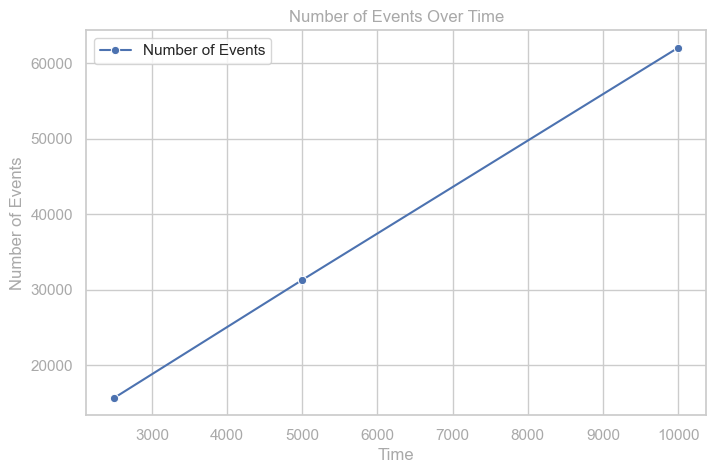

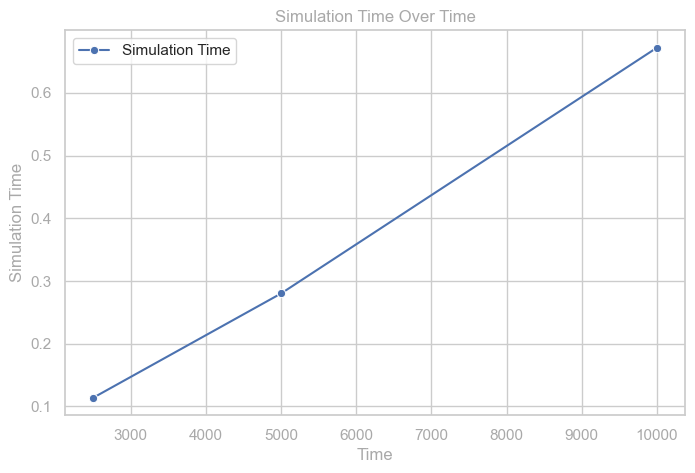

In [12]:
data_list = [
    {'simulation_time': 0.11374855041503906, 'total_time': 18.82762908935547, 'termination': 1739711571.3624566, 'n_events': 15673, 'time': 2500},
    {'simulation_time': 0.2800478935241699, 'total_time': 43.393065214157104, 'termination': 1739711496.6766849, 'n_events': 31292, 'time': 5000},
    {'simulation_time': 0.6719632148742676, 'total_time': 109.55330610275269, 'termination': 1739711353.935902, 'n_events': 62054, 'time': 10000}
]

# Convert list of dictionaries to DataFrame
df = pd.DataFrame(data_list)

# Apply log scale to time axis for proportional scaling
df['log_time'] = np.log10(df['time'])

# Set seaborn style
sns.set_theme(style="whitegrid")

# Plot 1: Time vs Number of Events
plt.figure(figsize=(8, 5))
sns.lineplot(x='time', y='n_events', data=df, marker='o', label='Number of Events')
plt.xlabel("Time", color='darkgray')
plt.ylabel("Number of Events", color='darkgray')
plt.title("Number of Events Over Time", color='darkgray')
plt.xticks(color='darkgray')
plt.yticks(color='darkgray')
plt.legend()
plt.show()

# Plot 2: Time vs Simulation Time
plt.figure(figsize=(8, 5))
sns.lineplot(x='time', y='simulation_time', data=df, marker='o', label='Simulation Time')
plt.xlabel("Time", color='darkgray')
plt.ylabel("Simulation Time", color='darkgray')
plt.title("Simulation Time Over Time", color='darkgray')
plt.xticks(color='darkgray')
plt.yticks(color='darkgray')
plt.legend()
plt.show()

Rerun these again but graph should look the same

In [13]:
sim_stats_2_5k

{'simulation_time': 0.2154088020324707,
 'total_time': 18.498108386993408,
 'termination': 1739805932.0559096,
 'n_events': 5552}

In [14]:
sim_stats_5k

{'simulation_time': 0.14258909225463867,
 'total_time': 49.107651233673096,
 'termination': 1739805690.311429,
 'n_events': 10809}

In [15]:
sim_stats_10k

{'simulation_time': 0.7577509880065918,
 'total_time': 106.37300753593445,
 'termination': 1739804221.5963278,
 'n_events': 21622}

### Riders

In [16]:
riders_df['status'].unique()

array(['reached_destination', 'abandoned', 'transit'], dtype=object)

C:\Users\haria\AppData\Local\Temp\ipykernel_26572\2009558090.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='status', y='count', data=status_counts, palette=custom_palette)


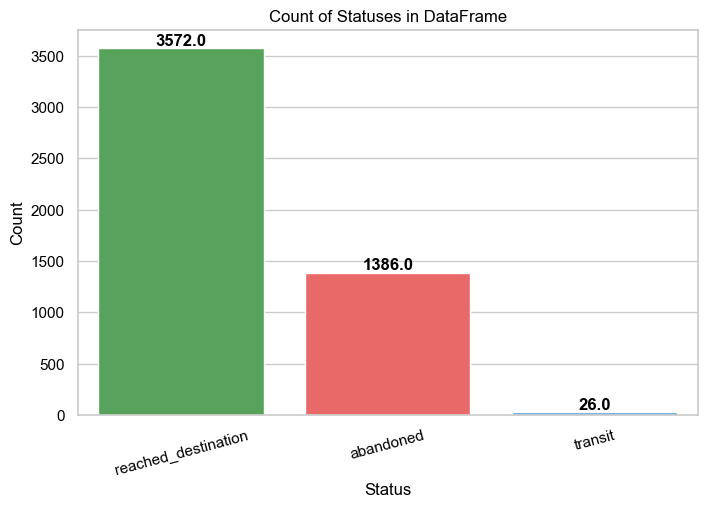

In [17]:
# Count occurrences of each status
status_counts = riders_df['status'].value_counts().reset_index()
status_counts.columns = ['status', 'count']

custom_palette = {
    'reached_destination': '#4CAF50',  # Vibrant Green
    'abandoned': '#FF5252',            # Bright Red
    'transit': '#42A5F5',              # Vivid Blue
    'waiting': '#FFA726'               # Bright Orange
}
# Set seaborn style
sns.set_theme(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(8, 5))
ax = sns.barplot(x='status', y='count', data=status_counts, palette=custom_palette)

# Labels and title
plt.xlabel("Status", color='black')
plt.ylabel("Count", color='black')
plt.title("Count of Statuses in DataFrame", color='black')
plt.xticks(rotation=15, color='black')  # Slightly tilt labels for readability
plt.yticks(color='black')

# Show values on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

# Show the plot
plt.show()


Color stil a bit too aggressive for my taste

### rider abandon overtime

In [18]:
riders_df.head()

,id,current_location,origin,destination,become_available,patience_time,status,driver,pick_up_time,destination_time
r_0,r_0,"[11.973169683940732, 3.1203728088487304]","[11.973169683940732, 3.1203728088487304]","[3.119890406724053, 1.1616722433639892]",[6.020242861835042],[24.134770373855815],reached_destination,d_0,[35.12011083426869],[59.515544179727215]
r_1,r_1,"[14.161451555920909, 0.41168988591604894]","[14.161451555920909, 0.41168988591604894]","[19.398197043239886, 16.648852816008436]",[8.653734248925941],[2.864251502998821],abandoned,None,inf,inf
r_2,r_2,"[12.23705789444759, 2.7898772130408367]","[12.23705789444759, 2.7898772130408367]","[5.842892970704363, 7.327236865873834]",[10.49189855618047],[7.307216254346529],abandoned,None,inf,inf
r_3,r_3,"[3.9934756431671947, 10.284688768272233]","[3.9934756431671947, 10.284688768272233]","[11.84829137724085, 0.9290082543999545]",[11.180344541288353],[11.223996247840217],reached_destination,d_1,[44.06810056813677],[86.58537218491408]
r_4,r_4,"[1.9534422801276774, 13.684660530243137]","[1.9534422801276774, 13.684660530243137]","[8.803049874792027, 2.4407646968955765]",[14.256216563350176],[8.202566737642613],abandoned,None,inf,inf


In [19]:
# # Convert time from list to a single value
# riders_df['time'] = riders_df['become_available'].apply(lambda x: x[0])

# temp_df = riders_df.copy()

# # Remove 'waiting' status
# temp_df = temp_df[temp_df['status'] != 'waiting']

# # Define equal-sized time intervals
# time_min, time_max = temp_df['time'].min(), temp_df['time'].max()
# bin_edges = list(range(int(time_min), int(time_max) + 6, 5))  # Creating bins with a max span of 5
# temp_df['time_interval'] = pd.cut(temp_df['time'], bins=bin_edges, labels=[f"{bin_edges[i]}-{bin_edges[i+1]-1}" for i in range(len(bin_edges)-1)], include_lowest=True)

# # Combine 'reached_destination' and 'transit' into 'matched'
# temp_df['status'] = temp_df['status'].replace({'reached_destination': 'matched', 'transit': 'matched'})

# # Calculate rate of each status over time intervals
# status_counts = temp_df.groupby(['time_interval', 'status']).size().unstack(fill_value=0)
# status_rates = status_counts.div(status_counts.sum(axis=1), axis=0)

# # Set seaborn style
# sns.set_theme(style="whitegrid")

# # Create the line plot for rates
# plt.figure(figsize=(8, 5))
# sns.lineplot(data=status_rates, markers=True)

# # Labels and title
# plt.xlabel("Time Interval", color='darkgray')
# plt.ylabel("Rate", color='darkgray')
# plt.title("Rate of Each Status Over Time Intervals", color='darkgray')
# plt.xticks(color='darkgray')
# plt.yticks(color='darkgray')

# # Show the plot
# plt.show()

C:\Users\haria\AppData\Local\Temp\ipykernel_26572\1437983710.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  status_counts = temp_df.groupby(['time_interval', 'status']).size().unstack(fill_value=0)


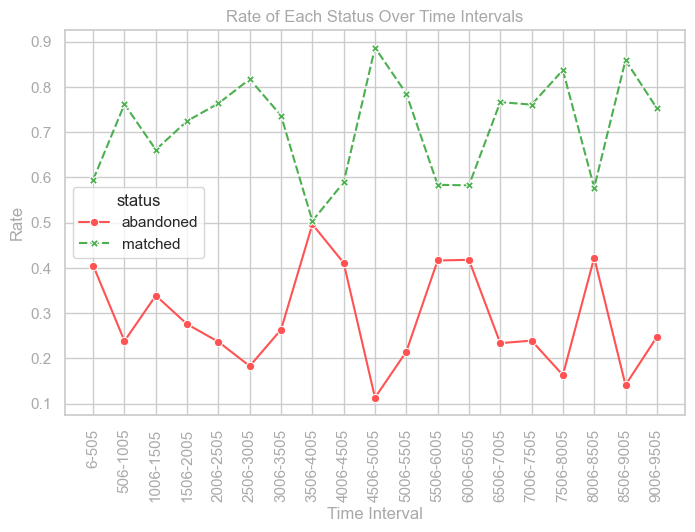

In [20]:
# Convert time from list to a single value


temp_df = riders_df.copy()

# Remove 'waiting' status
temp_df = temp_df[temp_df['status'] != 'waiting']
temp_df['time'] = temp_df['become_available'].apply(lambda x: x[0])


custom_palette = {
    'matched': '#4CAF50',  # Vibrant Green
    'abandoned': '#FF5252',            # Bright Red
}

# Define equal-sized time intervals
time_min, time_max = temp_df['time'].min(), temp_df['time'].max()
bin_edges = list(range(int(time_min), int(time_max) + 6, 500))  # Creating bins with a max span of 5
temp_df['time_interval'] = pd.cut(temp_df['time'], bins=bin_edges, labels=[f"{bin_edges[i]}-{bin_edges[i+1]-1}" for i in range(len(bin_edges)-1)], include_lowest=True)

# Combine 'reached_destination' and 'transit' into 'matched'
temp_df['status'] = temp_df['status'].replace({'reached_destination': 'matched', 'transit': 'matched'})

# Calculate rate of each status over time intervals
status_counts = temp_df.groupby(['time_interval', 'status']).size().unstack(fill_value=0)
status_rates = status_counts.div(status_counts.sum(axis=1), axis=0)

# Set seaborn style
sns.set_theme(style="whitegrid")

# Create the line plot for rates
plt.figure(figsize=(8, 5))
sns.lineplot(data=status_rates, markers=True, palette=custom_palette)

# Labels and title
plt.xlabel("Time Interval", color='darkgray')
plt.ylabel("Rate", color='darkgray')
plt.title("Rate of Each Status Over Time Intervals", color='darkgray')
plt.xticks(rotation=90, color='darkgray')
plt.yticks(color='darkgray')

# Show the plot
plt.show()

Try running this with double riders rates

looks like the system will never be stable (in case the passenger rates >> drivers) we might be able to justify this with uniform dist cdf

### Driver in the system overtime

In [21]:
drivers_df['time'] = drivers_df['become_available'].apply(lambda x: x[0])
drivers_df['offline_time'] = drivers_df['offline_time'].apply(lambda x: x[0])
drivers_df['become_available'] = drivers_df['become_available'].apply(lambda x: x[0])

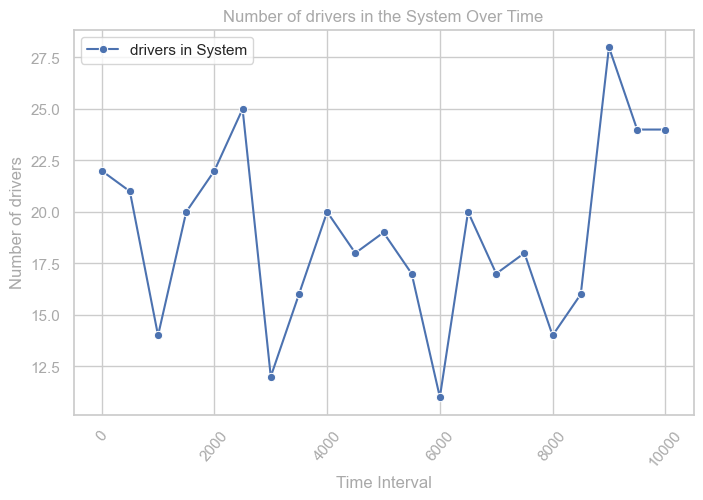

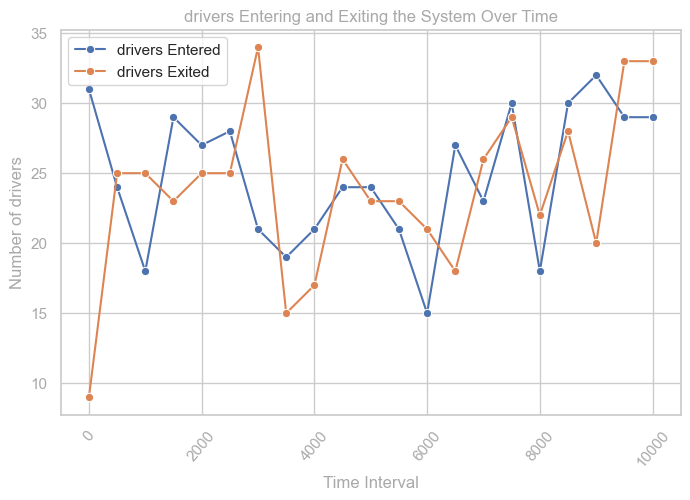

In [22]:
df = drivers_df.copy()
# Define time intervals in 500 increments
time_intervals = np.arange(0, 10001, 500)

# Ensure all lists have the same length
drivers_in_system = np.zeros(len(time_intervals))
drivers_entered = np.zeros(len(time_intervals))
drivers_exited = np.zeros(len(time_intervals))

for i in range(len(time_intervals) - 1):
    t_start, t_end = time_intervals[i], time_intervals[i + 1]
    in_system = ((df['become_available'] <= t_end) & ((df['offline_time'] > t_end) | (df['offline_time'] == np.inf))).sum()
    entered = ((df['become_available'] >= t_start) & (df['become_available'] < t_end)).sum()
    exited = ((df['offline_time'] >= t_start) & (df['offline_time'] < t_end)).sum()
    
    drivers_in_system[i] = in_system
    drivers_entered[i] = entered
    drivers_exited[i] = exited

# Adjust last element for plotting consistency
drivers_in_system[-1] = drivers_in_system[-2]
drivers_entered[-1] = drivers_entered[-2]
drivers_exited[-1] = drivers_exited[-2]

# Create DataFrame for plotting
interval_df = pd.DataFrame({
    'Time': time_intervals,
    'drivers in System': drivers_in_system,
    'drivers Entered': drivers_entered,
    'drivers Exited': drivers_exited
})

# Set seaborn style
sns.set_theme(style="whitegrid")

# Plot: Number of drivers in the system over time
plt.figure(figsize=(8, 5))
sns.lineplot(x='Time', y='drivers in System', data=interval_df, marker='o', label='drivers in System')
plt.xlabel("Time Interval", color='darkgray')
plt.ylabel("Number of drivers", color='darkgray')
plt.title("Number of drivers in the System Over Time", color='darkgray')
plt.xticks(color='darkgray', rotation=50)
plt.yticks(color='darkgray')
plt.legend()
plt.show()

# Plot: drivers entered and exited the system over time
plt.figure(figsize=(8, 5))
sns.lineplot(x='Time', y='drivers Entered', data=interval_df, marker='o', label='drivers Entered')
sns.lineplot(x='Time', y='drivers Exited', data=interval_df, marker='o', label='drivers Exited')
plt.xlabel("Time Interval", color='darkgray')
plt.ylabel("Number of drivers", color='darkgray')
plt.title("drivers Entering and Exiting the System Over Time", color='darkgray')
plt.xticks(color='darkgray', rotation=50)
plt.yticks(color='darkgray')
plt.legend()
plt.show()



You can see that numbers of driver become stable overtime.

### Rider in the system overtime

In [23]:
riders_df['time'] = riders_df['become_available'].apply(lambda x: x[0])
riders_df['destination_time'] = riders_df['destination_time'].apply(lambda x: x[0] if isinstance(x, (list, tuple)) and x[0] != np.inf else x)
riders_df['become_available'] = riders_df['become_available'].apply(lambda x: x[0])

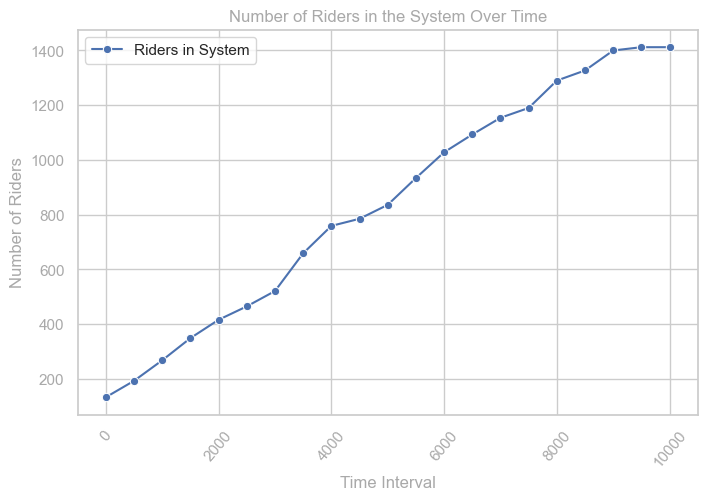

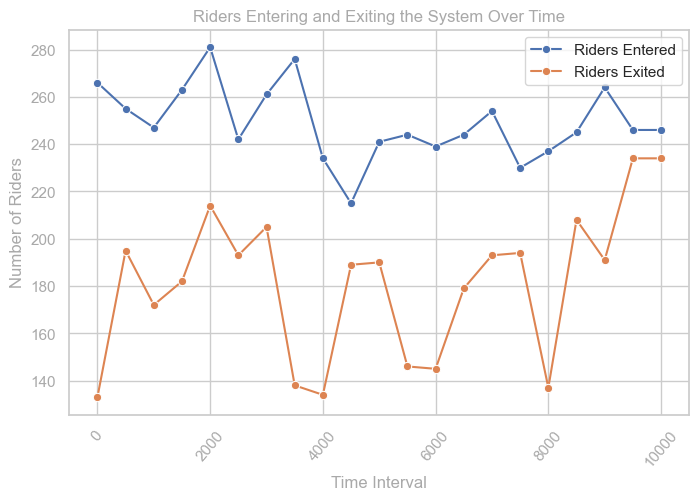

In [24]:
df = riders_df.copy()
# Define time intervals in 500 increments
time_intervals = np.arange(0, 10001, 500)

# Ensure all lists have the same length
riders_in_system = np.zeros(len(time_intervals))
riders_entered = np.zeros(len(time_intervals))
riders_exited = np.zeros(len(time_intervals))

for i in range(len(time_intervals) - 1):
    t_start, t_end = time_intervals[i], time_intervals[i + 1]
    in_system = ((df['become_available'] <= t_end) & ((df['destination_time'] > t_end) | (df['destination_time'] == np.inf))).sum()
    entered = ((df['become_available'] >= t_start) & (df['become_available'] < t_end)).sum()
    exited = ((df['destination_time'] >= t_start) & (df['destination_time'] < t_end)).sum()
    
    riders_in_system[i] = in_system
    riders_entered[i] = entered
    riders_exited[i] = exited

# Adjust last element for plotting consistency
riders_in_system[-1] = riders_in_system[-2]
riders_entered[-1] = riders_entered[-2]
riders_exited[-1] = riders_exited[-2]

# Create DataFrame for plotting
interval_df = pd.DataFrame({
    'Time': time_intervals,
    'Riders in System': riders_in_system,
    'Riders Entered': riders_entered,
    'Riders Exited': riders_exited
})

# Set seaborn style
sns.set_theme(style="whitegrid")

# Plot: Number of riders in the system over time
plt.figure(figsize=(8, 5))
sns.lineplot(x='Time', y='Riders in System', data=interval_df, marker='o', label='Riders in System')
plt.xlabel("Time Interval", color='darkgray')
plt.ylabel("Number of Riders", color='darkgray')
plt.title("Number of Riders in the System Over Time", color='darkgray')
plt.xticks(color='darkgray', rotation=50)
plt.yticks(color='darkgray')
plt.legend()
plt.show()

# Plot: Riders entered and exited the system over time
plt.figure(figsize=(8, 5))
sns.lineplot(x='Time', y='Riders Entered', data=interval_df, marker='o', label='Riders Entered')
sns.lineplot(x='Time', y='Riders Exited', data=interval_df, marker='o', label='Riders Exited')
plt.xlabel("Time Interval", color='darkgray')
plt.ylabel("Number of Riders", color='darkgray')
plt.title("Riders Entering and Exiting the System Over Time", color='darkgray')
plt.xticks(color='darkgray', rotation=50)
plt.yticks(color='darkgray')
plt.legend()
plt.show()



Easily be seen that the riders will linearly increase if riders entered in a faster rate than exited. Resulting in ever increasing riders

In [25]:
status_rates

status,abandoned,matched
time_interval,,
6-505,0.405204,0.594796
506-1005,0.238281,0.761719
1006-1505,0.338776,0.661224
1506-2005,0.275472,0.724528
2006-2505,0.236559,0.763441
2506-3005,0.182927,0.817073
3006-3505,0.263566,0.736434
3506-4005,0.496377,0.503623
4006-4505,0.411017,0.588983


## Some simple graph

#### Distance

In [26]:
drivers_df.head()

,id,current_location,origin,become_available,offline_time,status,matched_rider,earnings,current_trip,going_offline,...,fuel_cost,total_pickup_distance,total_dropoff_distance,total_distance,past_pickup,past_trip,past_fares,past_riders,past_locations,time
d_0,d_0,"[18.000462467960222, 7.068427586054362]","[3.6680901970686763, 6.0848448591907545]",9.385362,403.841519,dropping_off,None,217.119209,{},True,...,31.491748,60.899136,96.559604,157.458741,"[([3.6680901970686763, 6.0848448591907545], [1...","[([11.973169683940732, 3.1203728088487304], [3...","[21.13472490727384, 29.83003700817234, 34.2268...","[r_0, r_28, r_63, r_93, r_111, r_146, r_184, r...","[[3.6680901970686763, 6.0848448591907545], [11...",9.385362
d_1,d_1,"[16.550757911337485, 14.672287611228041]","[1.3010318597055903, 18.977710745066666]",13.398942,487.212708,offline,None,199.781749,{},True,...,30.694859,67.083419,86.390874,153.474293,"[([1.3010318597055903, 18.977710745066666], [3...","[([3.9934756431671947, 10.284688768272233], [1...","[27.431691557802584, 22.260188169416075, 21.22...","[r_3, r_50, r_72, r_79, r_135, r_159, r_177, r...","[[1.3010318597055903, 18.977710745066666], [3....",13.398942
d_2,d_2,"[19.752991274721158, 0.8021838282496496]","[5.426980635477918, 16.57475018303859]",17.138167,381.353765,dropping_off,None,183.112901,{},True,...,27.611310,55.500102,82.556450,138.056552,"[([5.426980635477918, 16.57475018303859], [3.6...","[([3.697089110510541, 19.391692555291172], [15...","[26.641783352320687, 45.89002890881228, 33.245...","[r_6, r_35, r_62, r_112, r_140, r_182]","[[5.426980635477918, 16.57475018303859], [3.69...",17.138167
d_3,d_3,"[4.974285451752598, 12.342899732080602]","[17.429211803754356, 16.07344153798229]",26.980772,360.563383,dropping_off,None,187.804379,{},True,...,28.326187,58.228743,83.402189,141.630933,"[([17.429211803754356, 16.07344153798229], [6....","[([6.287119621526534, 10.171413823294056], [18...","[28.89591503515118, 34.279263468549175, 20.448...","[r_14, r_54, r_75, r_113, r_132, r_164, r_189]","[[17.429211803754356, 16.07344153798229], [6.2...",26.980772
d_4,d_4,"[15.793970142849583, 13.174155510017522]","[12.840632923085755, 1.6827992999009767]",47.050656,376.143825,dropping_off,None,168.828186,{},True,...,25.659014,54.380978,73.914093,128.295071,"[([12.840632923085755, 1.6827992999009767], [1...","[([15.23239230657435, 4.752750879847993], [14....","[8.374555236283927, 35.12925773285004, 24.3565...","[r_22, r_21, r_64, r_88, r_115, r_127, r_180]","[[12.840632923085755, 1.6827992999009767], [15...",47.050656


In [27]:
total_dist = drivers_df['total_distance'].sum()
avg_dist_per_driver = drivers_df['total_distance'].mean()
filtered_drivers = drivers_df.loc[drivers_df['status'] == 'offline']
avg_avg_dist_per_driver_per_trip = (filtered_drivers['total_distance'] / filtered_drivers['number_of_trips']).mean()
avg_avg_pickup_per_driver_per_trip = (filtered_drivers['total_pickup_distance'] / filtered_drivers['number_of_trips']).mean()
avg_avg_trip_per_driver_per_trip = (filtered_drivers['total_dropoff_distance'] / filtered_drivers['number_of_trips']).mean()

In [28]:
dist_list = [avg_avg_dist_per_driver_per_trip, avg_avg_pickup_per_driver_per_trip, avg_avg_trip_per_driver_per_trip]
name_list = ['mean total distance', 'mean total pick up', 'mean total trip']

#### Could do something like the more saturated the rider the less pickup dist

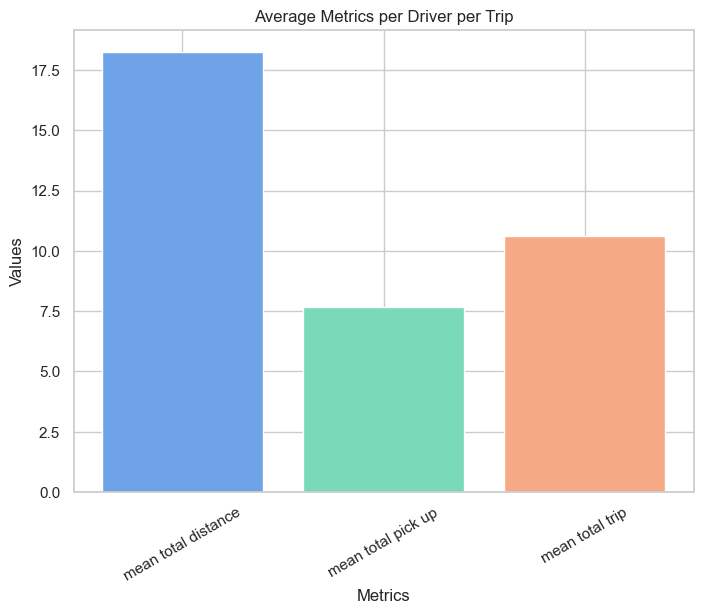

In [29]:
# Define vibrant pastel colors (mix of pastel and vibrant tones)
vibrant_pastel_colors = ['#6FA3E7', '#7AD9B8', '#F6A985']  

# Create bar chart with vibrant pastel colors
plt.figure(figsize=(8, 6))
plt.bar(name_list, dist_list, color=vibrant_pastel_colors)

# Labels and title
plt.xlabel("Metrics")
plt.ylabel("Values")
plt.title("Average Metrics per Driver per Trip")
plt.xticks(rotation=30)  # Rotate labels for readability

# Show plot
plt.show()


In [30]:
The_ratio = avg_avg_pickup_per_driver_per_trip/ avg_avg_trip_per_driver_per_trip
The_ratio

0.7218221606196662

In [31]:
avg_income = filtered_drivers['earnings'].mean()
avg_fuel_cost = filtered_drivers['fuel_cost'].mean()
avg_profits = avg_income - avg_fuel_cost

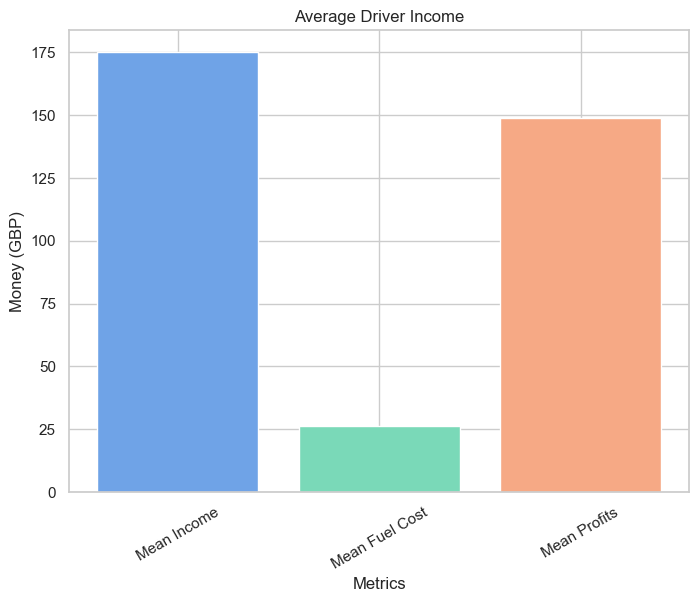

In [32]:
# Define vibrant pastel colors (mix of pastel and vibrant tones)
vibrant_pastel_colors = ['#6FA3E7', '#7AD9B8', '#F6A985']  

# Create bar chart with vibrant pastel colors
plt.figure(figsize=(8, 6))
plt.bar(['Mean Income', 'Mean Fuel Cost', 'Mean Profits'], [avg_income, avg_fuel_cost, avg_profits], color=vibrant_pastel_colors)

# Labels and title
plt.xlabel("Metrics")
plt.ylabel("Money (GBP)")
plt.title("Average Driver Income")
plt.xticks(rotation=30)  # Rotate labels for readability

# Show plot
plt.show()

In [33]:
avg_income_pt = (filtered_drivers['earnings'] / filtered_drivers['number_of_trips']).mean()
avg_fuel_cost_pt = (filtered_drivers['fuel_cost'] / filtered_drivers['number_of_trips']).mean()
avg_profits_pt = avg_income_pt - avg_fuel_cost_pt

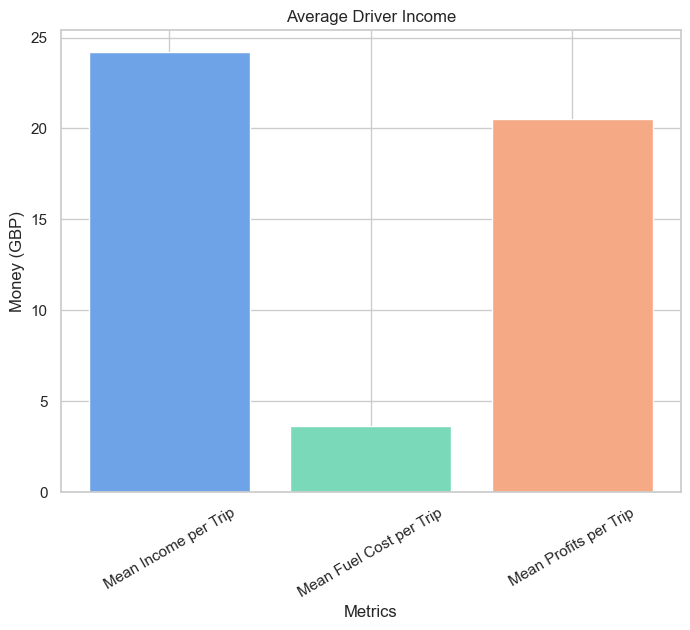

In [34]:
# Define vibrant pastel colors (mix of pastel and vibrant tones)
vibrant_pastel_colors = ['#6FA3E7', '#7AD9B8', '#F6A985']  

# Create bar chart with vibrant pastel colors
plt.figure(figsize=(8, 6))
plt.bar(['Mean Income per Trip', 'Mean Fuel Cost per Trip', 'Mean Profits per Trip'], [avg_income_pt, avg_fuel_cost_pt, avg_profits_pt], color=vibrant_pastel_colors)

# Labels and title
plt.xlabel("Metrics")
plt.ylabel("Money (GBP)")
plt.title("Average Driver Income")
plt.xticks(rotation=30)  # Rotate labels for readability

# Show plot
plt.show()

In [35]:
riders_df.head()

,id,current_location,origin,destination,become_available,patience_time,status,driver,pick_up_time,destination_time,time
r_0,r_0,"[11.973169683940732, 3.1203728088487304]","[11.973169683940732, 3.1203728088487304]","[3.119890406724053, 1.1616722433639892]",6.020243,[24.134770373855815],reached_destination,d_0,[35.12011083426869],[59.515544179727215],6.020243
r_1,r_1,"[14.161451555920909, 0.41168988591604894]","[14.161451555920909, 0.41168988591604894]","[19.398197043239886, 16.648852816008436]",8.653734,[2.864251502998821],abandoned,None,inf,inf,8.653734
r_2,r_2,"[12.23705789444759, 2.7898772130408367]","[12.23705789444759, 2.7898772130408367]","[5.842892970704363, 7.327236865873834]",10.491899,[7.307216254346529],abandoned,None,inf,inf,10.491899
r_3,r_3,"[3.9934756431671947, 10.284688768272233]","[3.9934756431671947, 10.284688768272233]","[11.84829137724085, 0.9290082543999545]",11.180345,[11.223996247840217],reached_destination,d_1,[44.06810056813677],[86.58537218491408],11.180345
r_4,r_4,"[1.9534422801276774, 13.684660530243137]","[1.9534422801276774, 13.684660530243137]","[8.803049874792027, 2.4407646968955765]",14.256217,[8.202566737642613],abandoned,None,inf,inf,14.256217


### Riders Wait Time

In [65]:
riders_df['patience_time'] = riders_df['patience_time'].apply(lambda x: x[0] if isinstance(x, (list, tuple)) and x[0] != np.inf else x)
riders_df['pick_up_time'] = riders_df['pick_up_time'].apply(lambda x: x[0] if isinstance(x, (list, tuple)) and x[0] != np.inf else x)
riders_df['destination_time'] = riders_df['destination_time'].apply(lambda x: x[0] if isinstance(x, (list, tuple)) and x[0] != np.inf else x)

In [66]:
riders_df['total_system_time'] = riders_df['destination_time'] - riders_df['time']
riders_df['total_trip_time'] = riders_df['destination_time'] - riders_df['pick_up_time']
riders_df['waiting_time'] = riders_df['pick_up_time'] - riders_df['time']

In [67]:
fitered_riders_df = riders_df.loc[riders_df['status'] == 'reached_destination']
avg_waiting_time = fitered_riders_df['waiting_time'].mean()[0]
avg_trip_time = fitered_riders_df['total_trip_time'].mean()[0]
avg_patience_time = fitered_riders_df['patience_time'].mean()[0]

In [68]:
avg_waiting_time

25.76495614250278

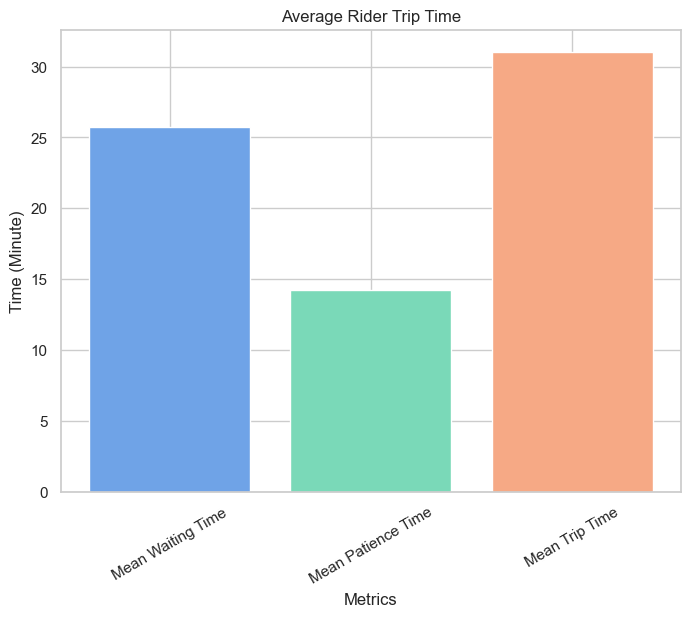

In [69]:
# Define vibrant pastel colors (mix of pastel and vibrant tones)
vibrant_pastel_colors = ['#6FA3E7', '#7AD9B8', '#F6A985']  

# Create bar chart with vibrant pastel colors
plt.figure(figsize=(8, 6))
plt.bar(['Mean Waiting Time', 'Mean Patience Time', 'Mean Trip Time'], [avg_waiting_time, avg_patience_time, avg_trip_time], color=vibrant_pastel_colors)

# Labels and title
plt.xlabel("Metrics")
plt.ylabel("Time (Minute)")
plt.title("Average Rider Trip Time")
plt.xticks(rotation=30)  # Rotate labels for readability

# Show plot
plt.show()

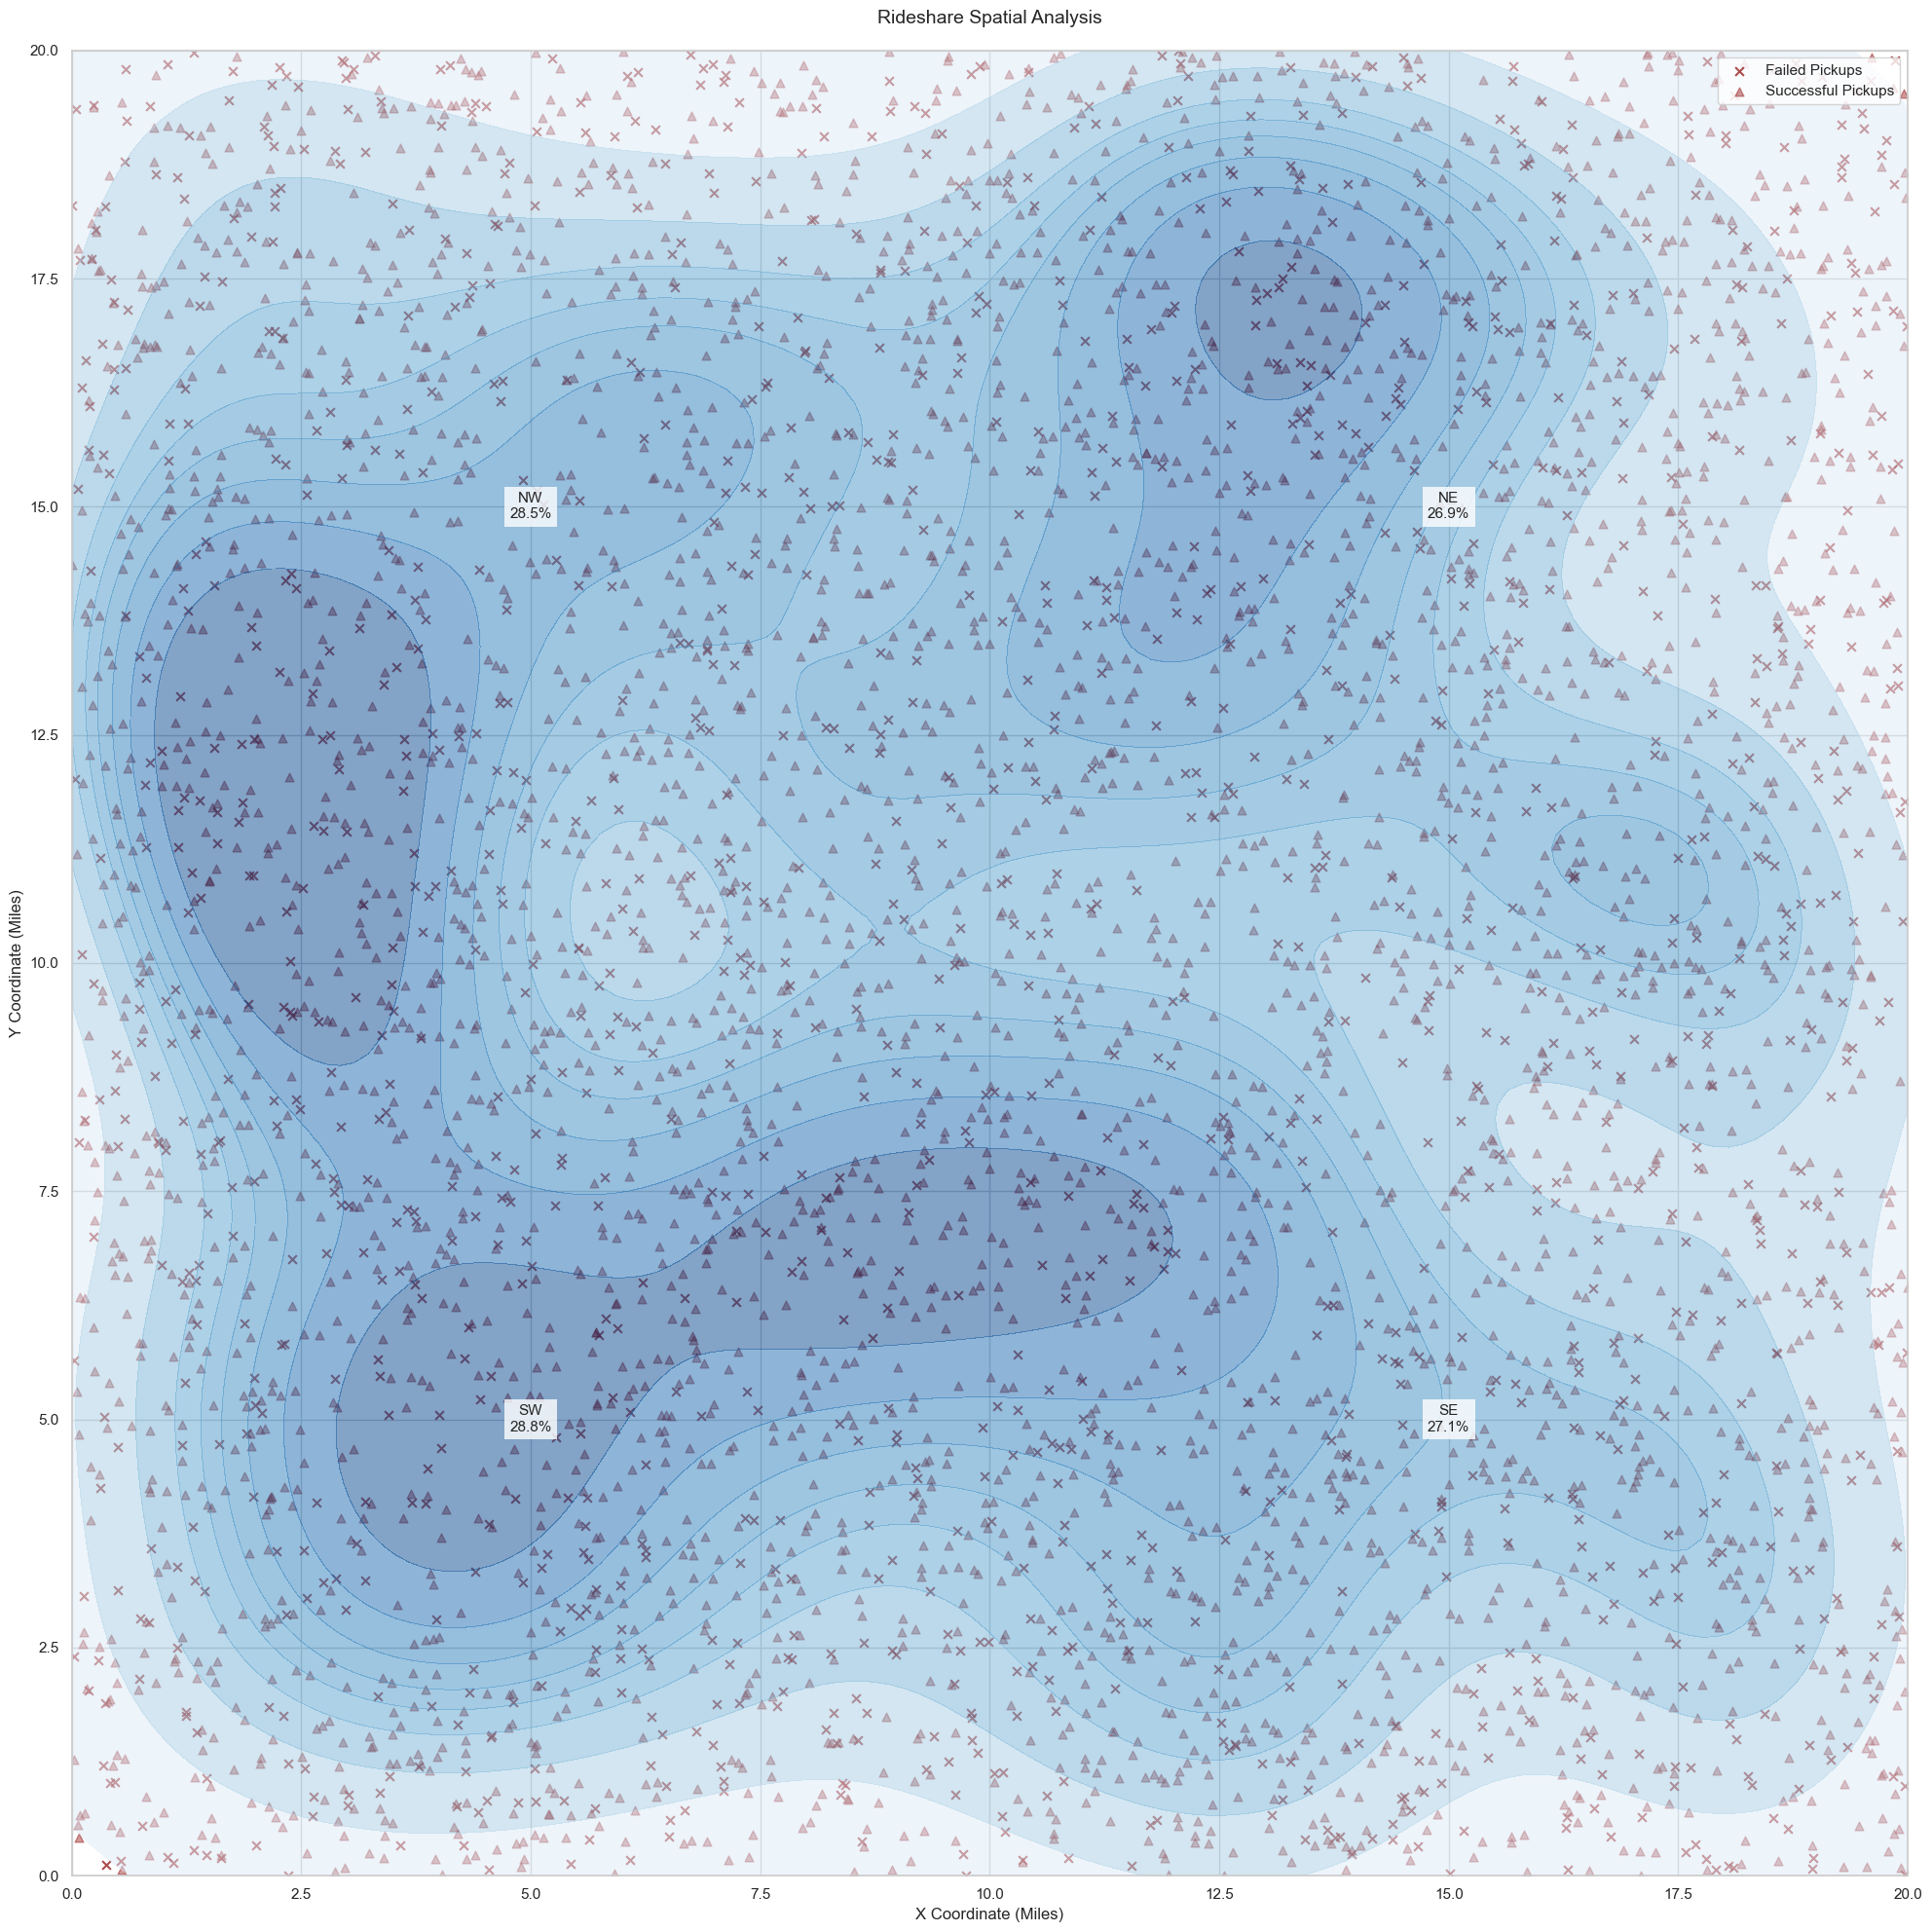

In [91]:
drivers = pd.read_pickle('D:/University of Edinburgh/All coding stuff/Simulation/Git/Squareshire_simulation/Codes/output/drivers.pkl')
riders = pd.read_pickle('D:/University of Edinburgh/All coding stuff/Simulation/Git/Squareshire_simulation/Codes/output/riders.pkl')
#drivers = pd.read_pickle('../output/drivers.pkl')
#riders = pd.read_pickle('../output/riders.pkl')


riders['x'] = riders['origin'].apply(lambda loc: loc[0])
riders['y'] = riders['origin'].apply(lambda loc: loc[1])
drivers['x'] = drivers['origin'].apply(lambda loc: loc[0])
drivers['y'] = drivers['origin'].apply(lambda loc: loc[1])

plt.figure(figsize=(20, 20))
sns.set_style("whitegrid")

# Plotting rides with status of abandoned
abandoned = riders[riders['status'] == 'abandoned']
plt.scatter(abandoned['x'], abandoned['y'], marker = 'x',
            c='darkred', alpha=0.7, label='Failed Pickups', s=40)

# Plotting rides which successfully reached destination
matched = riders[riders['status'] == 'reached_destination']
plt.scatter(matched['x'], matched['y'], marker ='^',
            c='darkred', alpha=0.4, label='Successful Pickups', s=40)

# # Despite it being random there has to be some areas with hotspots so we plot it 
# since we arent running it for a really long time
kde = sns.kdeplot(x=drivers['x'], y=drivers['y'], 
                 cmap='Blues', fill=True, alpha=0.5,
                 bw_adjust=0.8, cbar=False, label='Driver Activity Hotspots')
#Cbar values didnt make much sense so turning it off, need to explain it verbally as to what its doing


# Configure plot limits and labels
plt.xlim(0, 20)
plt.ylim(0, 20)
plt.title("Rideshare Spatial Analysis", pad=20, fontsize=14)
plt.xlabel("X Coordinate (Miles)", fontsize=12)
plt.ylabel("Y Coordinate (Miles)", fontsize=12)
plt.legend(loc='upper right')

# setting up quadrants
quadrant_bins = [0, 10, 20]
quadrant_map = {'00': 'SW', '01': 'NW', '10': 'SE', '11': 'NE'}

# Calculating abandonment rates for each quadrant
riders['quadrant'] = (
    pd.cut(riders['x'], bins=quadrant_bins, labels=False).astype(str) + 
    pd.cut(riders['y'], bins=quadrant_bins, labels=False).astype(str)
)

quadrant_stats = (
    riders.groupby('quadrant', observed=True)['status']
    .apply(lambda x: (x == 'abandoned').mean()*100)
    .reset_index(name='abandon_rate')
)

# Need to give percentage of abandonment rate in each quadrant
quadrant_positions = {
    '00': (5, 5),   # SW
    '01': (5, 15),  # NW
    '10': (15, 5),  # SE
    '11': (15, 15)  # NE
}

for q in quadrant_stats.itertuples():
    x_center, y_center = quadrant_positions.get(q.quadrant, (0,0))
    plt.text(x_center, y_center, 
             f"{quadrant_map.get(q.quadrant, '')}\n{q.abandon_rate:.1f}%",
             ha='center', va='center', fontsize=11, 
             bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))

plt.tight_layout()
plt.show()

The graph above showcases which region have a higher abandoment and finished rates, the regions which have a higher crosses can be assumed that there were more "riders" than drivers" which caused more abandoment, Potentially looking at time might also help, im planning to add a color bar for showing time, but Im worried about it being more messy, essentially that colorbar/gradient on crosses and triangles would help us read time aswell, making it more "informative"

ValueError: Unable to determine Axes to steal space for Colorbar. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.

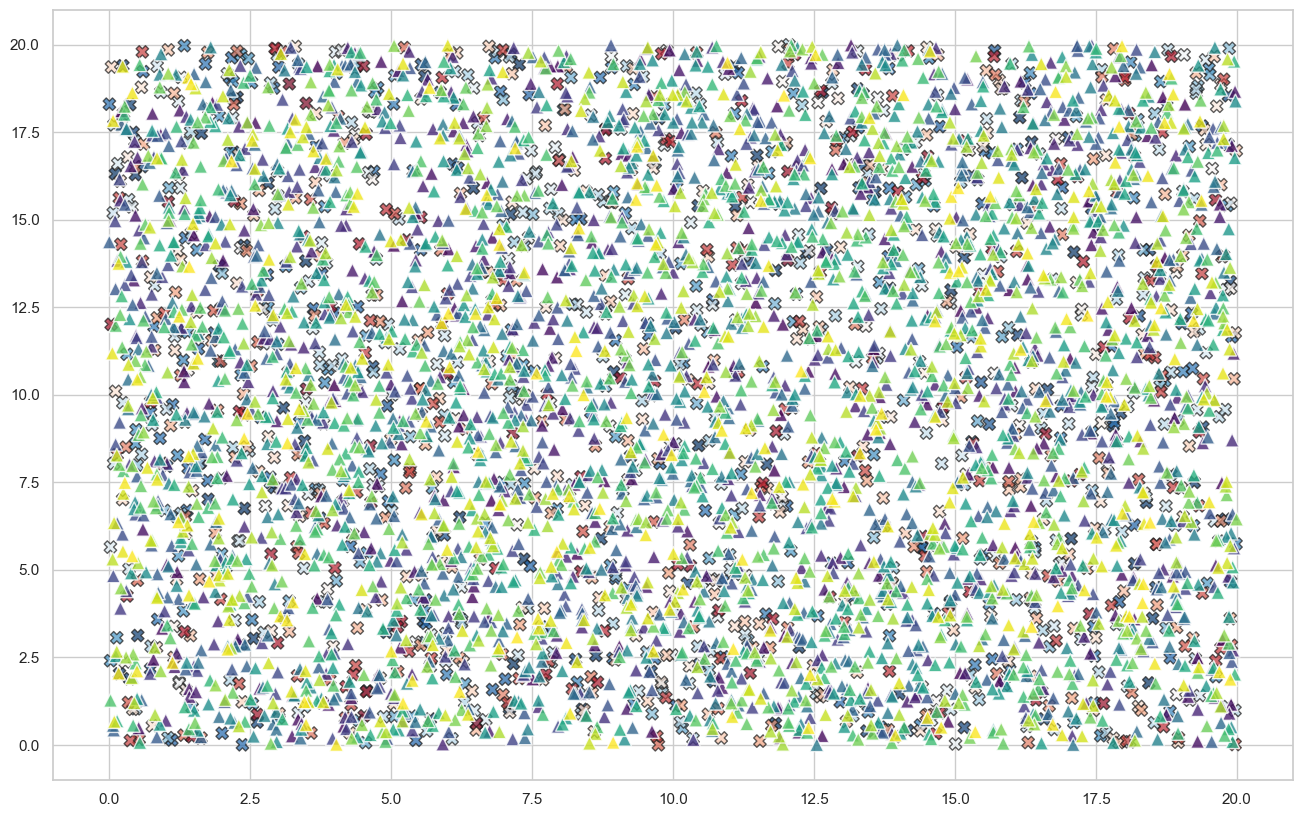

In [ ]:
#Trying to plot the failed and successful pickups while accounting for time, this graph and the graph 
#when seen together would help us derive the hotspots and time for failed pickups and successful pickups


'''
# Temporal Analysis of Rider Outcomes with Unified Color Scaling


# Create plot
plt.figure(figsize=(16, 10))
sns.set_style("whitegrid")

# Create normalized color scale
norm = plt.Normalize(min_time, max_time)
sm = plt.cm.ScalarMappable(cmap='viridis', norm=norm)

# Plot abandoned riders
abandoned_sc = plt.scatter(
    x=abandoned['x'],
    y=abandoned['y'],
    c=abandoned['event_time'],
    cmap='RdBu_r',
    norm=norm,
    marker='X',
    s=80,
    edgecolor='k',
    alpha=0.7,
    label='Abandonments'
)

# Plot successful pickups
matched_sc = plt.scatter(
    x=matched['x'],
    y=matched['y'],
    c=matched['event_time'],
    cmap='viridis',
    norm=norm,
    marker='^',
    s=100,
    edgecolor='w',
    alpha=0.8,
    label='Completed Pickups'
)

# Add unified colorbar
cbar = plt.colorbar(sm, label='Simulation Time (Hours)')
cbar.ax.tick_params(labelsize=10)

# Configure plot
plt.xlim(0, 20)
plt.ylim(0, 20)
plt.title("Temporal-Spatial Distribution of Rider Outcomes", pad=20, fontsize=14)
plt.xlabel("X Coordinate (Miles)", fontsize=12)
plt.ylabel("Y Coordinate (Miles)", fontsize=12)
plt.legend(loc='upper right', frameon=True)

# Add temporal reference lines
time_ticks = np.linspace(min_time, max_time, 5)
for t in time_ticks:
    plt.axvline(x=0, ymin=0, ymax=1, color='gray', alpha=0.3, linestyle='--') 
    plt.text(0.5, 19.8, f'{t:.1f}h', ha='center', va='top', 
             backgroundcolor='white', fontsize=9)

plt.tight_layout()
plt.show()
'''

#FAILED

In [ ]:
drivers_df = pd.read_pickle('D:/University of Edinburgh/All coding stuff/Simulation/Git/Squareshire_simulation/Codes/output/drivers.pkl')
riders_df = pd.read_pickle('D:/University of Edinburgh/All coding stuff/Simulation/Git/Squareshire_simulation/Codes/output/riders.pkl')
#drivers = pd.read_pickle('../output/drivers.pkl')
#riders = pd.read_pickle('../output/riders.pkl')

#extract locations just in case you want to plot them later
#riders_df['x'] = riders_df['origin'].apply(lambda loc: loc[0])
#riders_df['y'] = riders_df['origin'].apply(lambda loc: loc[1])
#drivers_df['x'] = drivers_df['origin'].apply(lambda loc: loc[0])
#drivers_df['y'] = drivers_df['origin'].apply(lambda loc: loc[1])



# Get time in hours from dataset and timestamps
riders_df['abandon_time'] = riders_df['become_available'] + riders_df['patience_time']
riders_df['pickup_time_hours'] = riders_df['pick_up_time'] / 60

# Filter datasets
abandoned = riders_df[riders_df['status'] == 'abandoned'].copy()
matched = riders_df[riders_df['status'] == 'reached_destination'].copy()

#convert things to hours
abandoned['event_time'] = abandoned['abandon_time'] / 60
matched['event_time'] = matched['pickup_time_hours']
#abandoned['event_time'] = pd.Series(abandoned['event_time'])
#matched['event_time'] = pd.Series(matched['event_time'])


print(f"Abandoned riders count: {len(abandoned)}")
print(f"Matched riders count: {len(matched)}")
print(f"NaN in abandoned event_time: {abandoned['event_time'].isna().sum()}")
print(f"NaN in matched event_time: {matched['event_time'].isna().sum()}")
print(f"Min/Max event time (Abandoned): {abandoned['event_time'].min()} - {abandoned['event_time'].max()}")
print(f"Min/Max event time (Matched): {matched['event_time'].min()} - {matched['event_time'].max()}")
print(f"Abandoned event_time count: {len(abandoned['event_time'])}")
print(f"Matched event_time count: {len(matched['event_time'])}")
print(f"Unique values in abandoned: {abandoned['event_time'].nunique()}")
print(f"Unique values in matched: {matched['event_time'].nunique()}")
print(f"Head of abandoned event_time:\n{abandoned['event_time'].head()}")
print(f"Head of matched event_time:\n{matched['event_time'].head()}")


max_time = max(abandoned['event_time'].max(), matched['event_time'].max())
min_time = min(abandoned['event_time'].min(), matched['event_time'].min())


plt.figure(figsize=(12, 6))
sns.histplot(abandoned['event_time'], bins=50, color='red', label='Abandoned Riders', alpha=0.6, kde=True)
sns.histplot(matched['event_time'], bins=50, color='green', label='Successful Pickups', alpha=0.6, kde=True)

plt.xlabel("Time (Hours)")
plt.ylabel("Number of Riders")
plt.title("Distribution of Rider Outcomes Over Time")
plt.legend()
plt.show()


#need to get rid of the array and make it scalar.

AttributeError: 'DataFrame' object has no attribute 'item'

Trying for driver and rider satisfaction

Rider Satisfaction KPIs:
Abandonment Rate (status = 'abandoned')
Waiting Time (pick_up_time - become_available)
Total rides/services completed (get rate)
Price-to-Distance Ratio

Driver satisfaction KPIs
Earnings Per Hour (earnings/(offline_time - become_available))
Deadhead Mileage Ratio (total_pickup_distance/total_distance)
Utilization Rate (active_time/online_duration)
Earnings Fairness (Gini Coefficient)  >>> Need to see the theory behind this to model 


In [ ]:
drivers_df = pd.read_pickle('D:/University of Edinburgh/All coding stuff/Simulation/Git/Squareshire_simulation/Codes/output/drivers.pkl')
riders_df = pd.read_pickle('D:/University of Edinburgh/All coding stuff/Simulation/Git/Squareshire_simulation/Codes/output/riders.pkl')

# Get time in hours from dataset and timestamps
riders_df['abandon_time'] = riders_df['become_available'] + riders_df['patience_time']
riders_df['pickup_time_hours'] = riders_df['pick_up_time'] / 60

# Filter datasets
abandoned = riders_df[riders_df['status'] == 'abandoned'].copy()
matched = riders_df[riders_df['status'] == 'reached_destination'].copy()

#convert things to hours
abandoned['event_time'] = abandoned['abandon_time'] / 60
matched['event_time'] = matched['pickup_time_hours']


# Get time in hours from dataset and timestamps
riders_df['abandon_time'] = riders_df['become_available'] + riders_df['patience_time']
riders_df['pickup_time_hours'] = riders_df['pick_up_time'] / 60

# Filter datasets
abandoned = riders_df[riders_df['status'] == 'abandoned'].copy()
matched = riders_df[riders_df['status'] == 'reached_destination'].copy()

#convert things to hours
abandoned['event_time'] = abandoned['abandon_time'] / 60
matched['event_time'] = matched['pickup_time_hours']


# Abandonment Rate Timeline
plt.figure(figsize=(12,6))
sns.lineplot(x='time_bin', y='abandon_rate', 
            data=riders_df.groupby(pd.cut(riders_df['become_available'], bins=24))['status']
                          .apply(lambda x: (x=='abandoned').mean()).reset_index(name='abandon_rate'),
            color='crimson')
plt.title('Hourly Rider Abandonment Rates')
plt.xlabel('Simulation Hour'); plt.ylabel('Abandonment Rate');

# Wait Time Distribution
plt.figure(figsize=(10,6))
sns.ecdfplot(data=riders_df[riders_df['status']=='reached_destination'], 
             x='wait_time', stat='proportion', color='limegreen')
plt.axvline(x=300, color='red', linestyle='--', label='5-Min Threshold')
plt.title('Cumulative Wait Time Distribution');


ValueError: Index data must be 1-dimensional

<Figure size 1200x600 with 0 Axes>

In [106]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# ---------------------------
# Load Data
# ---------------------------
drivers_df = pd.read_pickle('D:/University of Edinburgh/All coding stuff/Simulation/Git/Squareshire_simulation/Codes/output/drivers.pkl')
riders_df = pd.read_pickle('D:/University of Edinburgh/All coding stuff/Simulation/Git/Squareshire_simulation/Codes/output/riders.pkl')

# ---------------------------
# Preprocessing for Rider Satisfaction Graphs
# ---------------------------
# Assume 'become_available' is the time the rider request is received
# and 'pick_up_time' is the time the rider gets picked up (if served).
# We also assume that wait_time is computed (or compute if needed)
riders_df['wait_time'] = riders_df['pick_up_time'] - riders_df['become_available']  # in seconds (or minutes)

# For riders, we want to see:
# 1. Abandonment Rate by time bins.
#    Here, we group by the time of request arrival (using 24 bins).
#    Note: We use .squeeze() to ensure the become_available column is 1-dimensional.
time_bins = pd.cut(riders_df['become_available'].squeeze(), bins=24)
abandon_rate_data = (riders_df.groupby(time_bins)['status']
                     .apply(lambda x: (x=='abandoned').mean())
                     .reset_index(name='abandon_rate'))
# For ease of plotting, compute midpoints of the time intervals.
abandon_rate_data['time_bin_mid'] = abandon_rate_data['become_available'].apply(lambda interval: interval.mid)

# 2. Wait Time Distribution (for served riders)
served_riders = riders_df[riders_df['status'] == 'reached_destination'].copy()

# ---------------------------
# Preprocessing for Driver Satisfaction Graphs
# ---------------------------
# Compute earnings per hour if not already calculated.
# Assume drivers_df has 'earnings' and 'online_duration' (in hours).
drivers_df['earnings_per_hour'] = drivers_df['earnings'] / drivers_df['online_duration']

# ---------------------------
# Plotting Rider Satisfaction Graphs
# ---------------------------
# 1. Abandonment Rate Timeline
plt.figure(figsize=(12,6))
sns.lineplot(x='time_bin_mid', y='abandon_rate', data=abandon_rate_data, color='crimson')
plt.title('Hourly Rider Abandonment Rates')
plt.xlabel('Time (Simulation Hours)')
plt.ylabel('Abandonment Rate')
plt.show()

# 2. Cumulative Distribution of Wait Times for Served Riders
plt.figure(figsize=(10,6))
sns.ecdfplot(data=served_riders, x='wait_time', stat='proportion', color='limegreen')
# Example: adding a vertical line at a threshold (e.g., 300 seconds, adjust as needed)
plt.axvline(x=300, color='red', linestyle='--', label='5-Min Threshold')
plt.title('Cumulative Distribution of Wait Times')
plt.xlabel('Wait Time (seconds)')  # adjust unit if necessary
plt.ylabel('Cumulative Proportion')
plt.legend()
plt.show()

# ---------------------------
# Plotting Driver Satisfaction Graphs
# ---------------------------
# 1. Boxplot for Driver Earnings per Hour
plt.figure(figsize=(12,6))
sns.boxplot(x=drivers_df['earnings_per_hour'], color='steelblue')
plt.title('Driver Earnings per Hour Distribution')
plt.xlabel('Earnings per Hour (£)')
plt.show()

# 2. Histogram for Driver Earnings per Hour
plt.figure(figsize=(12,6))
sns.histplot(drivers_df['earnings_per_hour'], bins=20, kde=True, color='mediumpurple')
plt.title('Driver Earnings per Hour Histogram')
plt.xlabel('Earnings per Hour (£)')
plt.ylabel('Count')
plt.show()

# ---------------------------
# Deriving Composite Satisfaction Scores
# ---------------------------
# --- Rider Satisfaction Score (RSS) ---
# For example, define RSS so that if a rider abandoned, satisfaction is 0.
# Otherwise, a rider's satisfaction is higher if the wait time is lower and
# the fare (assumed to be computed already) is relatively low.
max_fare = served_riders['fare'].max()  # computed using only successful trips
riders_df['rss'] = np.where(
    riders_df['status'] == 'abandoned',
    0,
    (1 / np.log1p(riders_df['wait_time'])) * (1 - riders_df['fare'] / max_fare)
)

# --- Driver Satisfaction Score (DSS) ---
# For example, define DSS based on normalized earnings and a rest ratio.
# Assume drivers_df has:
# - 'earnings' and 'online_duration' (already used to compute earnings_per_hour)
# - 'offline_time' and 'online_duration' to compute a rest ratio: (offline_time - online_duration)/offline_time.
drivers_df['earnings_norm'] = drivers_df['earnings'] / drivers_df['earnings'].max()
drivers_df['rest_ratio'] = (drivers_df['offline_time'] - drivers_df['online_duration']) / drivers_df['offline_time']
# Here, weights are assigned arbitrarily (adjust as needed).
drivers_df['dss'] = 0.4 * drivers_df['earnings_norm'] + 0.3 * drivers_df['rest_ratio']

# ---------------------------
# Plotting Satisfaction Scores
# ---------------------------
plt.figure(figsize=(12,6))
sns.histplot(riders_df['rss'], bins=20, kde=True, color='coral')
plt.title('Distribution of Rider Satisfaction Score (RSS)')
plt.xlabel('Rider Satisfaction Score')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(12,6))
sns.histplot(drivers_df['dss'], bins=20, kde=True, color='seagreen')
plt.title('Distribution of Driver Satisfaction Score (DSS)')
plt.xlabel('Driver Satisfaction Score')
plt.ylabel('Count')
plt.show()


ValueError: Index data must be 1-dimensional

total_dist

Dumping ideas for now, will need to look up on how to code it and what commands I need to use, If its taking too long I will do it later.

1) Drivers satisfaction analysis : We use the amount of time he had to travel to pick people up vs time he was working/transporting, this is useful since we will obtain a clue about the amount of "money spent/wasted" for traveling to a rider vs the amount they were able to obtain, If we consider for all the drivers in an "hour" instead of "minute" or plot for individual drivers we would gain more insights, Recommendation use box plot if we are plotting for hours (12-24 boxes) gives us average driver satisfaction for that hour. 
This is more like a "fuel cost analysis" 

2) Rider satisfaction analysis: Riders waiting, riders abandoned and trips fulfilled, and the total amount of time spent for all those activities, if ride abandoned what was the potential money which was lost. So we can get an idea about the total possible earning from all riders and we split it equally amongst the driver to get an idea about "possible earnings" - here we dont consider fuel usage for now. Later we integrate the actual money earned (Without fuel). Once this is done we include fuel for both the cases, We can plot a bar graph or a line graph to show the changes in each cases. We can also include number of riders and drivers i.e how long it took to match.

3) We can talk about time where the amount of active riders > amount of active drivers 
now there could be multiple cases of this happening so we ensure that we plot it, We have a line graph
plotting at 1 i.e 1:1 ratio for driver and rider, and now every hour this fluctuates showcasing the shift of riders and driver ratio.

4) [IDEA] Driver shift analysis 5 to 8 hour shift split, we reduce/increase the amount of actual time for trip depending on how much drivers are working, this will help us know the earnings per "shifts". Logically as driver is fatigued his attention span and motor skills should reduce so the earnings would be low/less.
can plot revenue vs shift scatterplot with a line (regression line?), the colour would be associated to trips fulfilled by driver

5) Think of a graph so that we can correlate that 34rider per driver ratio and see if the earning was fairly divided amongst the driver, if not fairly what location or time saw this huge bias of earning (eg: driver during the start didnt earn much because lack of riders, while driver in mid simulation earnt more or had the luxury to get more riders because of the fact that there were now way to many riders in the map.)

6) Rider abandoment statistic, We have rider patience time, we need to see if there is a specific limit after which there is a higher chance of riders abandoning, so this will give us an idea of the "ideal" matching time for our drivers. If we get this time we can use it to our leverage. There was a specific filter used for this in statistics, it deals with probability and abandoment of a particular variable.

7) distance to waiting time: Is it possible that riders who want to travel longer have to wait longer? Since its randomly generated data this would be unlikely, but its still a good EDA or a find to have, since in real life this might not be the case, i.e drivers would not take a trip which exceeds a certain distance (so we can potentially account for this in our code.)

8) Driver dropoff analysis: How far a driver moves from their first rider drop off location, are they getting trapped in a certain boundary region like ants (think of it as an invisible wall which they can pass). Mainly this would make it look like that each driver will now have his own terriority, it would be interesting to animate this and see it, but mainly we can use a tree diagram or sankey diagram for drivers to see the distance split. 

9) Utilization : Time during trips/ shift duration , make histogram

10) Try for implementing a different map/grid/ change hotspots etc.

### Stats Test

### Improvement Analysis

1) In what situations where system will be stable?
   - Shows oversupply of drivers and riders
3) If the drivers matched before drop-off would that be better?